In [24]:
import sys
sys.path.append("../")

In [25]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math 
import delay.matrix.Matrix

In [5]:
def calculateProbability(fA, fB, omega):
    return max(0, min(1, 0.5 + omega*(fA - fB)/N))

In [15]:
def fA(x):
    return N/2 if -N/2 <= x <= 0 else N/2-x

def fB(x):
    return x+N/2 if -N/2 <= x <= 0 else N/2

def simulate():
    def nextElem(func):
        term = -N/2 if func == max else N/2
        rc = 1
        value = -rc if func == max else rc
        return func(x[current] + value, term)
    
    current = len(x)-1
    for _ in range(0, duration):
        previousA, previousB = fA(x[current - tauA]), fB(x[current - tauB])
        
        prob = calculateProbability(previousA, previousB, 1)
        r = random.random()
        if r <= prob:
            nextElement = nextElem(min) # +1
        else:
            nextElement = nextElem(max) # -1
                
        x.append(nextElement)
        current += 1

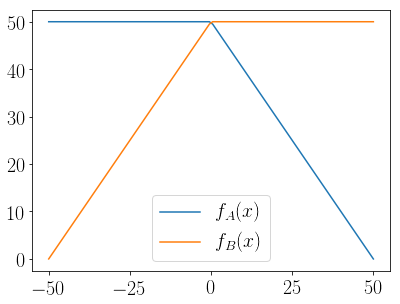

In [10]:
vfA = np.vectorize(fA)
vfB = np.vectorize(fB)

N = 100
plt.figure(figsize=(6.4, 4.8))
x = np.linspace(-N/2, N/2, num=100)

yA = vfA(x)
yB = vfB(x)


plt.plot(x, yA, label=r'$f_A(x)$')
plt.plot(x, yB, label=r'$f_B(x)$')
plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 20})

plt.legend()
plt.show()


µ =  -0.04440814891805325


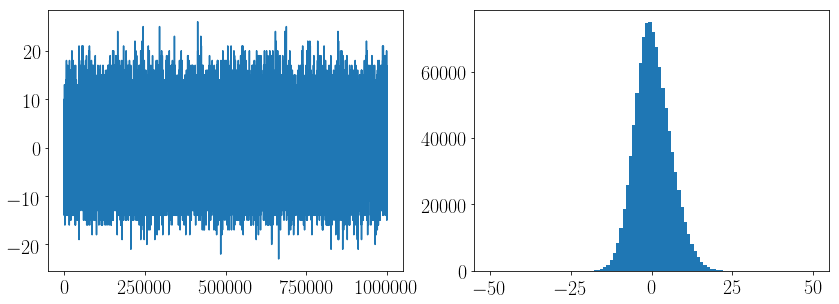

In [17]:
N = 100
tauA = 20
tauB = 0
x = [0] * 20 + [1]
duration = 10000000
conv = 100

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[8*N:], bins=np.linspace(-N/2, N/2, N+1))
p = (bins[5]-bins[4])/(duration - 8*N)*100
print('µ = ', np.mean(x[100*conv:]))

µ =  -0.01236976729333988


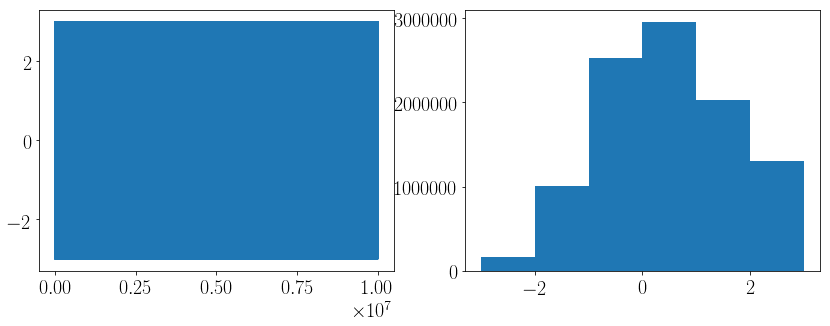

In [19]:
N = 6
tauA = 1
tauB = 0
x = [0] * max(tauA, tauB) + [1]
duration = 10000000
conv = 100

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[8*N:], bins=np.linspace(-N/2, N/2, N+1))
p = (bins[5]-bins[4])/(duration - 8*N)*100
print('µ = ', np.mean(x[100*conv:]))

IndexError: index 5 is out of bounds for axis 0 with size 4

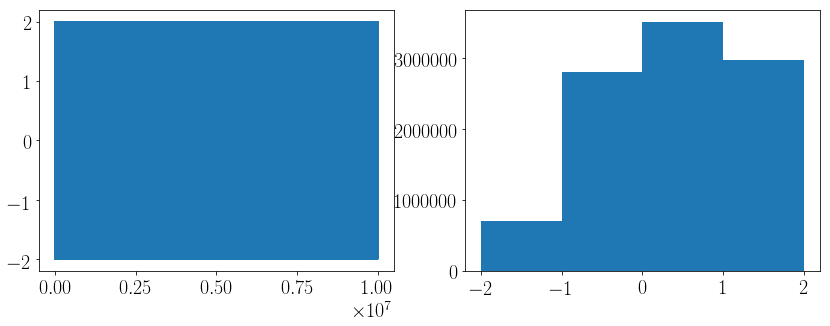

In [20]:
N = 4
tauA = 1
tauB = 0
x = [0] * max(tauA, tauB) + [1]
duration = 10000000
conv = 100

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[8*N:], bins=np.linspace(-N/2, N/2, N+1))
print('µ = ', np.mean(x[100*conv:]))

In [21]:
print('µ = ', np.mean(x[100*conv:]))

µ =  -0.03457586895377999
